<a href="https://colab.research.google.com/github/sametgirgin/FinanceNotebooks/blob/main/financial_data_module_1_lesson_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GOVERNMENT BOND YIELD BIVARIATE ANALYSIS AND YIELD CURVE ANALYSIS
MODULE 1 | LESSON 4


---
|  |  |
|:---|:---|
|**Reading Time** 60 minutes |   |
|**Prior Knowledge** U.S. Treasury Bonds, Yield Curve, Linear Algebra, Basic Python |   |
|**Keywords** Bond price-yield curve, Risk free interest rate, Nelson Siegel, Cubic Spline|  |

---

*In the previous lesson, we introduced U.S. Treasury price yield curve and discussed the shape of the curve. We also introduced the methods to fit U.S. Treasury curves using polynomial fitting techniques. In this lesson, we will continue to learn new analytical methods to understand U.S. Treasury yields. First, we will explore bivariate relationships of different yields, including correlation and covariance. Then, we will learn a new technique to extract key features of the U.S. Treasury yield curve to analyze the yield curve's behavior.*

## **1. Bivariate Analysis**
**Bivariate analysis** is a collection of methods to analyze the relationship between two variables. In finance, we are particularly interested in understanding how two variables interact with each other. In this lesson, we'll look at the yields of different U.S. Treasury bonds and how they move in relation to each other. The first bivariate analysis tool we will learn is covariance.
<br>
<br>
### **1.1 Covariance**
**Covariance** is a metric to measure how two variables move together. Specifically, covariance calculates the amount of movement the two variables exhibit. Here is the covariance formula:
<br>
$$Cov(𝑋,𝑌)=𝐸[(𝑋−𝐸[𝑋])(𝑌−𝐸[𝑌])]$$
<br>
Here are some of the properties of covariance:
1. If the covariance has a positive sign, it means the two variables move in the same direction.
2. If the covariance has a negative sign, the two variables move in opposite directions.
3. If the covariance is 0, the two variables are linearly uncorrelated (uncorrelated).

The higher the absolute value of the covariance of the two variables, the stronger the (positive or negative) relationship the two variables have. Let's pull some U.S. Treasury yield data to demonstrate covariance between two different yields.
<br>

A covariance matrix is a bivariate analysis measure for two variables. However, when we have several variables and want to know the pairwise relationships of these variables, we'll need a covariance matrix. A **covariance matrix** is a square matrix that represents the pairwise covariances between multiple variables in a dataset. Now, let's pull U.S. Treasury yield data and investigate their covariance matrix.

In [1]:
!pip install fredapi

In [2]:
import pandas as pd
from fredapi import Fred
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
# Initialize the FRED API with your key
fred = Fred(api_key='431be247208971e8d2845e22c950fc80') # Replace my APIKEY with "YOUR_API_KEY"

# List of Treasury yield series IDs
series_ids = ['DGS1MO', 'DGS3MO', 'DGS6MO', 'DGS1', 'DGS2', 'DGS3', 'DGS5', \
              'DGS7', 'DGS10', 'DGS20', 'DGS30']

# Function to get data for a single series
def get_yield_data(series_id):
    data = fred.get_series(series_id, observation_start="1975-01-01", observation_end="2024-05-03")
    return data

# Get data for all series
yields_dict = {series_id: get_yield_data(series_id) for series_id in series_ids}

# Combine into a single DataFrame
yields = pd.DataFrame(yields_dict)

# Rename columns for clarity
yields.columns = ['1 Month', '3 Month', '6 Month', '1 Year', '2 Year', '3 Year', '5 Year', \
                  '7 Year', '10 Year', '20 Year', '30 Year']

In [4]:
# Make datetime as the index
yields.index = pd.to_datetime(yields.index)

In [5]:
# Drop NaN in the dataset
yields = yields.dropna()

In [6]:
# Calculate covariance matrix for US Treasury yields in the dataset
covariance_matrix = yields.cov()
print("Covariance Matrix:")
print(covariance_matrix)

Covariance Matrix:
          1 Month   3 Month   6 Month    1 Year    2 Year    3 Year    5 Year  \
1 Month  2.909927  2.946278  2.948709  2.812408  2.499031  2.251515  1.850674   
3 Month  2.946278  3.004493  3.018967  2.887166  2.571375  2.317856  1.901841   
6 Month  2.948709  3.018967  3.051413  2.931246  2.624882  2.372696  1.951042   
1 Year   2.812408  2.887166  2.931246  2.836161  2.569272  2.340278  1.944752   
2 Year   2.499031  2.571375  2.624882  2.569272  2.388302  2.216908  1.897526   
3 Year   2.251515  2.317856  2.372696  2.340278  2.216908  2.092766  1.842915   
5 Year   1.850674  1.901841  1.951042  1.944752  1.897526  1.842915  1.714385   
7 Year   1.565717  1.605385  1.647697  1.654011  1.648671  1.634697  1.582433   
10 Year  1.315260  1.344596  1.381242  1.395294  1.418752  1.435157  1.447139   
20 Year  1.078020  1.098030  1.128773  1.154327  1.214425  1.267258  1.350980   
30 Year  0.862766  0.872645  0.893530  0.919017  0.988536  1.052167  1.161403   

        

From the above covariance matrix for U.S. Treasury yields, we can see all pairwise yields have positive covariances. It means when the yield of one maturity increases, the other yields will also increase. We can visualize the covariance matrix with a heatmap in Python.

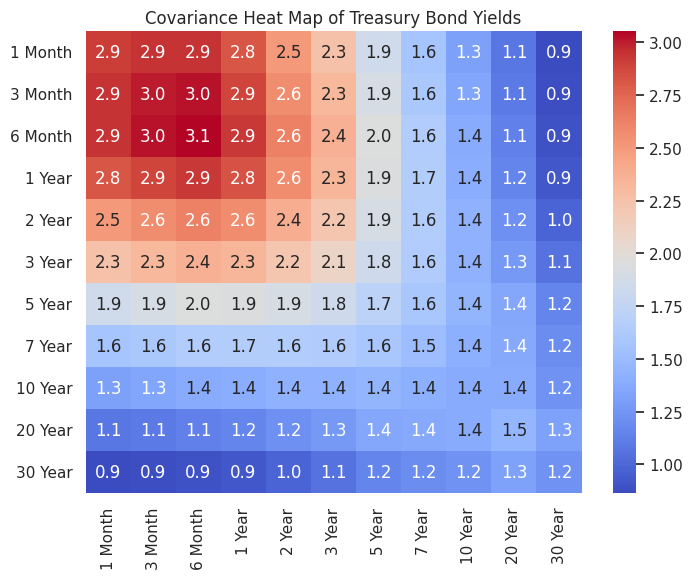

In [7]:
#Make a heatmap for covariance matrix
plt.figure(figsize=(8, 6))
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Covariance Heat Map of Treasury Bond Yields')
plt.show()

From the above covariance matrix heatmap, we can better read the differences of the covariance numbers. However, one downside of covariance is its value changes when the scales of two variables change. We cannot just compare different covariances for different pairwise variables to evaluate how close they move together. Because of this issue, we use correlation more often in data analysis.
<br>
<br>
### **1.2 Correlation**
Correlation is also a metric to measure the co-movement of the two variables. However, it eliminates the scale issue mentioned above by dividing covariance with the square root of the multiplication of the two variables' variances. Here is the correlation math formula:
<br>
<br>
$$Corr(X,Y)=\frac{Cov(X,Y)}{\sqrt{Var(X)*Var(Y)}}$$<br>
where $Cov(X,Y)$ is the covariance of $X$ and $Y$, $Var(X)$ and $Var(Y)$ are variances of $X$ and $Y$.
<br>
<br>
Here are some properties of correlation:

1. Unlike covariance, the value of correlation is limited between −1 and 1.
2. If the correlation of two variables is greater than 0, the two variables are positively correlated.
3. If the correlation of two variables is less than 0, the two variables are negatively correlated.
4. If two variables are perfectly positively correlated, the correlation will be 1.
5. If two variables are perfectly negative correlated, the correlation will be −1.
6. If the correlation is 0, the two variables are linearly uncorrelated.

Like with a covariance matrix, if we have several variables, we can use a **correlation matrix** to present correlation metrics for pairwise variables. Let's calculate the correlation matrix for our U.S. Treasury yield data.

In [8]:
# Calculate correlation matrix for US Treasury yields in the dataset
correlation_matrix = yields.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
          1 Month   3 Month   6 Month    1 Year    2 Year    3 Year    5 Year  \
1 Month  1.000000  0.996431  0.989556  0.978975  0.947951  0.912375  0.828580   
3 Month  0.996431  1.000000  0.997062  0.989056  0.959920  0.924359  0.837981   
6 Month  0.989556  0.997062  1.000000  0.996406  0.972332  0.938926  0.853025   
1 Year   0.978975  0.989056  0.996406  1.000000  0.987188  0.960598  0.881951   
2 Year   0.947951  0.959920  0.972332  0.987188  1.000000  0.991614  0.937754   
3 Year   0.912375  0.924359  0.938926  0.960598  0.991614  1.000000  0.972950   
5 Year   0.828580  0.837981  0.853025  0.881951  0.937754  0.972950  1.000000   
7 Year   0.748376  0.755164  0.769085  0.800794  0.869836  0.921350  0.985414   
10 Year  0.656702  0.660700  0.673469  0.705664  0.781916  0.844962  0.941356   
20 Year  0.523785  0.525045  0.535579  0.568108  0.651319  0.726060  0.855190   
30 Year  0.456151  0.454056  0.461334  0.492170  0.576905  0.655966  0.799992   

       

Next, let's make a heatmap for the correlation matrix to better read the result.

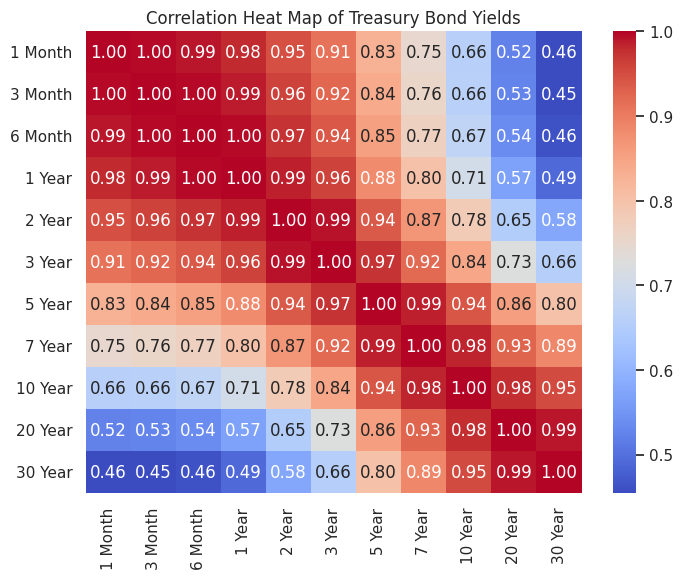

In [9]:
# Make a heatmap for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heat Map of Treasury Bond Yields')
plt.show()

From the above correlation matrix heatmap for U.S. Treasury yields, we can compare correlations among different pairwise yields. First, we can see the correlations on the diagonal cells are all 1s. It is easy to understand because all yields move perfectly in the same direction with themselves. Secondly, another interesting observation is that two yields that have close maturities have higher correlations. As the difference of the maturities of two yields widen, the correlation of the two yields gets lower.
<br>
<br>
Due to its easy-to-understand property, a correlation metric is a commonly used and crucial measurement for bivariate analysis. Understanding the correlation between different Treasury bond yields is crucial for risk management, portfolio construction, and understanding market dynamics. It helps quantify how different parts of the yield curve move in relation to each other, which is essential for strategies like yield curve trades and immunization in fixed-income portfolios.

### **2. Feature Extractions and Principal Component Analysis**
In this section, we are going to introduce a method to extract key features from a dataset. It is called **principal component analysis (PCA)**. Oftentimes, we try to discover key common factors or features that can explain the movement of all variables in a dataset. If we can find these key common factors that can represent most of the data variation in the dataset, we won't need to use the whole dataset for analysis. Instead, we can focus on analyzing these key factors. This is a data dimension reduction technique. It is very crucial that it can reduce the size of the dataset to make a lot of algorithms run more efficiently.  
<br>
In this section, we will continue to use the U.S. Treasury yield dataset to demonstrate this technique. We will show a step-by-step process for conducting PCA. Our first step is to standardize the scales of variables in our dataset.
<br>
<br>
### **2.1 Standardizing Variables**
**Standardizing (or normalizing)** a variable is a common statistical technique used to transform a variable into a standard scale. It converts a variable so that it has a mean of 0 and a standard deviation of 1. Here is the formula to standardize a variable:

$$Z=\frac{X-\mu}{\sigma}$$

Where:
<br>
$Z$ = standardized variable with mean = 0 and standard deviation = 1
<br>
$X$ = original variable
<br>
$\mu$ = mean of the original variable
<br>
$\sigma$ = standard deviation of the original variable

Here are the benefits of standardizing variables:
1. Making all variables comparable on the same scale
2. Facilitating calculation of the other analyses requiring same-scale variables

Now let's standardize the U.S. Treasury yield dataset. We first need to calculate the mean and standard deviation of each yield. Then, we will apply the above formula to our dataset to create a standardized (normalized) dataset.



In [10]:
#Calculate means for all yields in the dataset
yield_means = yields.mean()
print("Yield Means:")
print(yield_means)


Yield Means:
1 Month    1.449053
3 Month    1.518396
6 Month    1.627451
1 Year     1.717973
2 Year     1.905475
3 Year     2.097270
5 Year     2.485802
7 Year     2.806259
10 Year    3.088349
20 Year    3.620395
30 Year    3.724571
dtype: float64


In [11]:
#Calculate standard deviations for all yields in the dataset
yield_stds = yields.std()
print("Yield Standard Deviations:")
print(yield_stds)

Yield Standard Deviations:
1 Month    1.705851
3 Month    1.733347
6 Month    1.746829
1 Year     1.684091
2 Year     1.545413
3 Year     1.446639
5 Year     1.309345
7 Year     1.226457
10 Year    1.174092
20 Year    1.206514
30 Year    1.108774
dtype: float64


In [12]:
# Now create a standardized US Treasury yield dataset
standardized_data = (yields - yield_means) / yield_stds
print("Standardized Yield (first 5 rows):")
print(standardized_data.head())


Standardized Yield (first 5 rows):
             1 Month   3 Month   6 Month    1 Year    2 Year    3 Year  \
2001-07-31  1.301958  1.166300  1.054796  1.075968  1.219431  1.356751   
2001-08-01  1.290234  1.160531  1.054796  1.093781  1.245314  1.377489   
2001-08-02  1.290234  1.160531  1.049071  1.099719  1.284139  1.432789   
2001-08-03  1.278510  1.154762  1.054796  1.099719  1.297080  1.467352   
2001-08-06  1.272647  1.154762  1.054796  1.093781  1.277668  1.432789   

              5 Year    7 Year   10 Year   20 Year   30 Year  
2001-07-31  1.591786  1.674532  1.687817  1.649052  1.610273  
2001-08-01  1.629973  1.707147  1.721886  1.665629  1.628311  
2001-08-02  1.683435  1.764222  1.772989  1.707071  1.664387  
2001-08-03  1.706348  1.780529  1.798541  1.723647  1.682425  
2001-08-06  1.698710  1.780529  1.790023  1.723647  1.682425  


Usually, preparing a standardized dataset is part of the data preparation step before running the analysis. Make sure to standardize your dataset if the analysis you are going to run requires variables to be on the same scale.
<br>
Before moving on to the next step of the PCA, we need to learn new tools from linear algebra. In the next two sections, we will introduce eigenvectors and eigenvalues.
<br>
### **2.2 Eigenvectors and Eigenvalues**
In this section, we will learn the definitions of eigenvectors and eigenvalues and how to calculate them. Eigenanalysis is a very important linear algebra method in finance. Please review the required reading for this lesson to understand this topic. In the next section, we will use visualization to enhance our understanding of eigenvectors and eigenvalues.
<br>
### **2.3 Visualization of Eigenvectors and Eigenvalues**
In this section, we will use graphs to explain the concepts of eigenvectors and eigenvalues.
<br>

Vectors in a two-dimensional coordinate system are described by their magnitude and direction. A linear transformation occurs when we multiply a vector by a matrix. The transformation can change both the vector's magnitude and direction.
However, there are certain unique vectors that will maintain their direction or just switch to the opposite direction when a linear transformation happens. The only change is the magnitude of these vectors. These special vectors are called eigenvectors. Let's first revisit the equation between eigenvectors and eigenvalues from the last equation:
<br>
$$Ax=\lambda x$$
<br>
where:
<br>
$A$ is the linear transformation matrix
<br>
$x$ is eigenvector
<br>
$\lambda$ is the magnitude metric or eigenvalue
<br>
<br>
Let's first look at the left side of the equation. It corresponds to the linear transformation of a vector we described above. On the right side, the vector multiplies with a scalar. When the left-hand side of the equation equals the right-hand side of the equation, it means the linear transformation of the vector equals a magnitude change of the same vector. Based on what we described about an eigenvector, the vector in this equation is an eigenvector. Figure 1 below demonstrates this concept visually.
<br>
<br>
**Figure 1: Visual Demonstration of Eigenvectors and Eigenvalues**
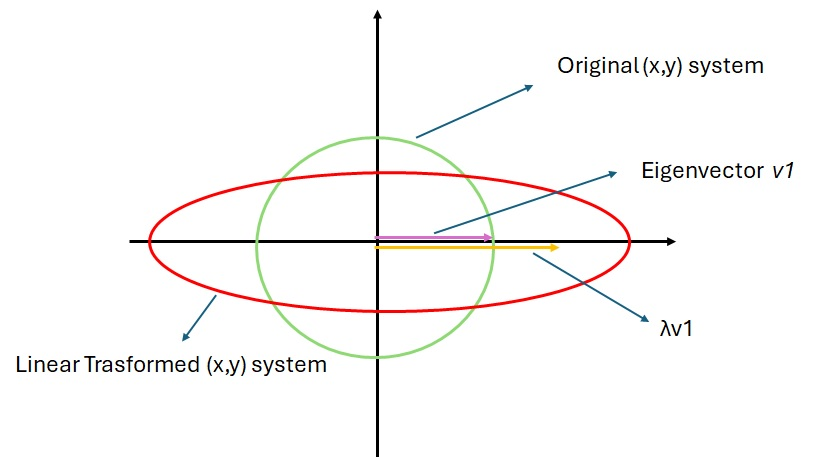

<br>
<br>


From the above figure, we can see the purple eigenvector preserves its direction after the linear transformation, which is shown by the orange vector. The transformation merely stretches or compresses the eigenvector, without changing its direction.
<br>
<br>
The eigenvalue associated with an eigenvector is the number by which the eigenvector is scaled during transformation.
   - If the eigenvalue is positive, the eigenvector is stretched in its original direction.
   - If negative, the eigenvector is stretched in the opposite direction.
   - If the eigenvalue is 1, the eigenvector remains unchanged.
   - If 0, the eigenvector is collapsed to a point.
When representing eigenvalues as vector lengths, the length of each eigenvector arrow can be scaled to represent its corresponding eigenvalue.

### **2.4 Derive Principal Components**
The next step of PCA is to find the covariance matrix of the standardized dataset. For a standardized dataset, its covariance matrix will be the same as the correlation matrix of the pre-standardized dataset. In the following Python code, we first import the necessary packages for matrix manipulation and for eigenvector/eigenvalue calculation. Then, we will get the covariance matrix for the standardized data and draw a heatmap for the covariance matrix.

In [13]:
import numpy as np
from numpy import linalg as LA

In [14]:
# Calculate covariance matrix of the standardized dataset
std_data_cov = standardized_data.cov()

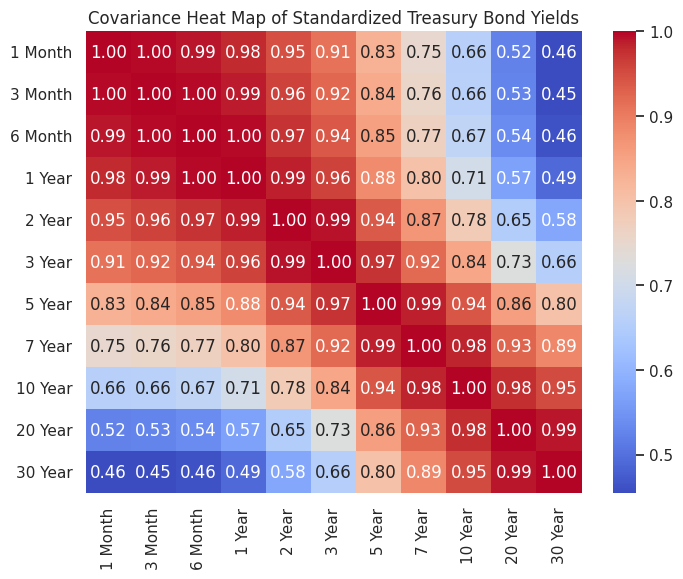

In [15]:
# Draw a heatmap of the covariance matrix
plt.figure(figsize=(8, 6))
sns.heatmap(std_data_cov, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Covariance Heat Map of Standardized Treasury Bond Yields')
plt.show()

Now let's calculate the eigenvectors and eigenvalues of the covariance matrix of the standardized yield dataset.

In [16]:
# Calculate eigenvectors and eigenvalues of the covariance matrix of standardized yield dataset
eigenvalues, eigenvectors = LA.eig(std_data_cov)
eigenvalues

array([9.22236235e+00, 1.63341019e+00, 1.17347718e-01, 1.46747161e-02,
       5.37172584e-03, 3.70149555e-03, 1.61309240e-03, 6.97458739e-04,
       4.12103724e-04, 2.47130907e-04, 1.62022336e-04])

In [17]:
eigenvectors

array([[ 0.29838306,  0.30407626,  0.44114252,  0.53274513, -0.16709103,
        -0.3702677 , -0.33473909,  0.24039038,  0.02716335, -0.06687106,
        -0.00401581],
       [ 0.3004742 ,  0.30709453,  0.3256805 ,  0.10407045,  0.09017425,
         0.13428768,  0.45363295, -0.58333199, -0.13905681,  0.31674937,
         0.08135824],
       [ 0.30335843,  0.29873569,  0.17614053, -0.25730089,  0.24045099,
         0.34295333,  0.10807462,  0.13460411,  0.32846299, -0.58367918,
        -0.26019232],
       [ 0.30894871,  0.26727645, -0.00945148, -0.42112655,  0.09742097,
         0.16475673, -0.15471834,  0.48093818, -0.17006916,  0.43202651,
         0.38500876],
       [ 0.31879358,  0.17616334, -0.28944958, -0.31333639, -0.25331718,
        -0.2316792 , -0.23709616, -0.21742618, -0.3594238 ,  0.02750551,
        -0.57801452],
       [ 0.32383758,  0.08574516, -0.41253571, -0.06981027, -0.2557664 ,
        -0.27857918,  0.04283274, -0.253605  ,  0.24613993, -0.32221553,
         0.582

From the above output, we can see that the eigenvalues and corresponding eigenvectors are ordered in descending order by the values of eigenvalues. In PCA, we also call eigenvectors **loadings**. We will see why this is important later.
<br>

We can view this collection of all eigenvectors as a linear transformation matrix to the standardized dataset. The transformed data will have a very interesting feature that we will introduce soon. Let's transform the standardized data with eigenvectors first.


In [18]:
# Transform standardized data with Loadings
principal_components = standardized_data.dot(eigenvectors)
principal_components.columns = ["PC_1","PC_2","PC_3","PC_4","PC_5","PC_6","PC_7","PC_8","PC_9","PC_10","PC_11"]
principal_components.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11
2001-07-31,4.608202,-0.918184,0.138746,0.223360,-0.013690,-0.063247,-0.008572,-0.006278,0.002652,0.017945,-0.002084
2001-08-01,4.665170,-0.950595,0.102492,0.220182,-0.013318,-0.054096,-0.014505,-0.002266,0.000391,0.027474,-0.006491
2001-08-02,4.766161,-1.009754,0.054519,0.230244,-0.021179,-0.064157,-0.017119,-0.011726,-0.002439,0.025895,-0.003628
2001-08-03,4.807092,-1.038602,0.027695,0.224234,-0.025575,-0.063723,-0.018644,-0.020406,0.009374,0.017296,0.002344
2001-08-06,4.781112,-1.044855,0.048161,0.228694,-0.013594,-0.051783,-0.009102,-0.010319,0.003817,0.021904,-0.007042


The above result shows 11 transformed variables. In PCA, they are called **principal components**. Remember we mentioned earlier that the eigenvalues from PCA are in descending order. These principal components are also presented in the same order as their corresponding eigenvalues. For example, PC_1 corresponds to the first eigenvalue, which is 9.22. PC_2 corresponds to the second highest eigenvalue, which is 1.63.
<br>

The most important feature of PCA is **the leading principal components can explain higher portions of the variance of the dataset than the rest of the principal components**. For example, PC_1 can explain more variance in the standardized data than PC_2. But by how much? The corresponding eigenvalue for PC_1 is the variance of the whole data explained by PC_1. It is 9.22 in this case. By the same logic, PC_2 explains 1.63 of the total variance of the dataset. We can sum up all the eigenvalues to get the total variance of the data. From the total variance of the data, we can also calculate the percentage of variance contribution each principal component catches. Here is the Python code.


In [19]:
# Put data into a DataFrame
df_eigval = pd.DataFrame({"Eigenvalues":eigenvalues}, index=range(1,12))

# Work out explained proportion
df_eigval["Explained proportion"] = df_eigval["Eigenvalues"] / np.sum(df_eigval["Eigenvalues"])
#Format as percentage
df_eigval.style.format({"Explained proportion": "{:.2%}"})

,Eigenvalues,Explained proportion
1,9.222362,83.84%
2,1.633410,14.85%
3,0.117348,1.07%
4,0.014675,0.13%
5,0.005372,0.05%
6,0.003701,0.03%
7,0.001613,0.01%
8,0.000697,0.01%
9,0.000412,0.00%
10,0.000247,0.00%


From the above table, we can see PC_1 can explain almost 84% of the variance in the standardized data. PC_2 can explain almost 15% of the variance in the standardized data. The first two leading principal components can explain almost 99% of the variance in the dataset. The rest of the 9 principal components only explain 1% of the variance of the data. Hence, to make data analysis more efficient without losing too much information, we can just use the first two principal components for analysis instead of all 11 principal components. Due to this special feature, we also call PCA a data-dimension reduction technique.
<br>

PCA's application is very wide in financial analysis and machine learning. For example, for image analysis, the original collection of images may be large, but by using PCA, we can reduce the data size while still preserving the key features of the images.
<br>
<br>


### **2.5. Principal Component Analysis for U.S. Treasury Yield**
The great thing about using PCA to analyze the U.S. Treasury yield curve is that it can decompose the yield curve into a number of principal components (Oprea). The first three leading principal components describe the following features of the yield curve:
<br>
1. PC_1: the parallel shift of the yield curve (shift).
2. PC_2: the flattening or steeping of the yield curve (tilt).
3. PC_3: Curvature change of the yield curve (twist).
<br></n>

First, let's draw the yield curve as the benchmark for better comparison (Bjerring).

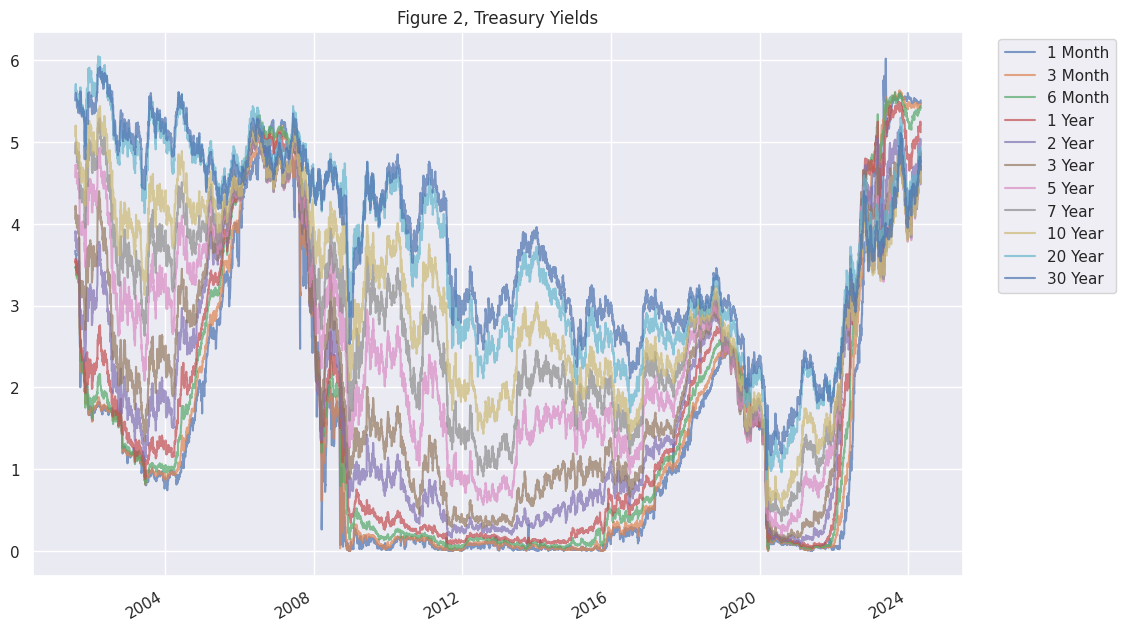

In [20]:
# Treasury Yield Curve
yields.plot(figsize=(12, 8), title='Figure 2, Treasury Yields', alpha=0.7) # Plot the yields
plt.legend(bbox_to_anchor=(1.03, 1))
plt.show()

Now, let's draw principal components. Let's start from PC_1.

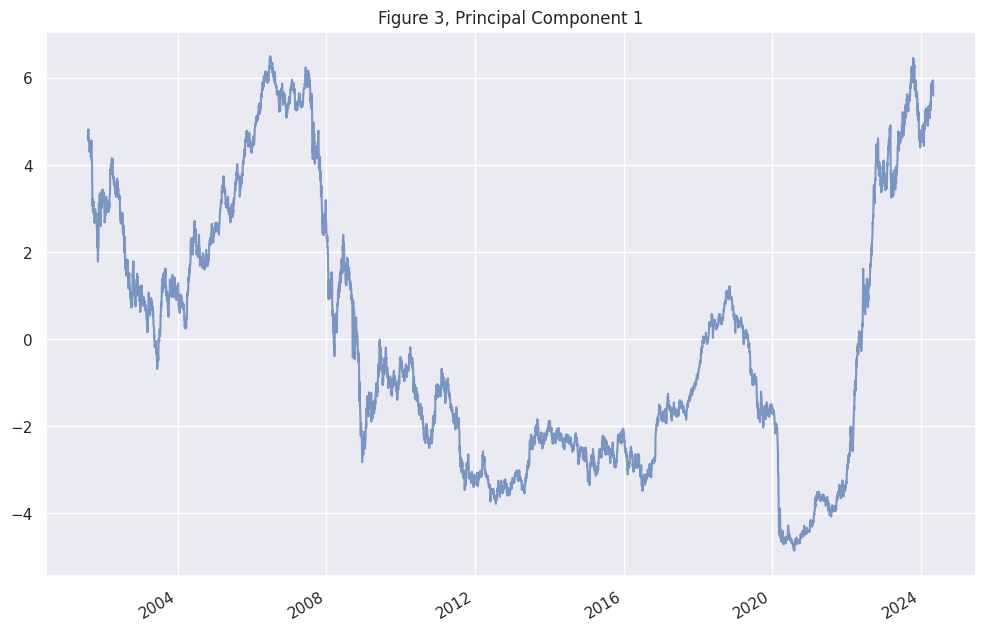

In [21]:
# Plot PC_1
principal_components["PC_1"].plot(figsize=(12, 8), title='Figure 3, Principal Component 1', alpha=0.7)
plt.show()

From the above Figure 3 of PC_1, we can see the pattern looks similar to the patterns of Figure 2 (this graph starts from 2001 because we dropped NaN). This PC_1 is used to represent the yield curve parallel shift. Next, let's analyze PC_2. PC_2 is usually used to analyze how tilted the yield curve is. The following demonstration in Python code explains why PC_2 is used to analyze tilt.
<br>

First, let's calculate the difference of 2-year yield and 10-year yield as the yield curve tilt and draw a graph.

In [22]:
#Calculate slope (difference) of 2-year Treasury yield and 10-year Treasury yield
df_s = pd.DataFrame(data = standardized_data)
df_s = df_s[["2 Year","10 Year"]]
df_s["Tilt"] = df_s["2 Year"] - df_s["10 Year"]
df_s.head()

,2 Year,10 Year,Tilt
2001-07-31,1.219431,1.687817,-0.468386
2001-08-01,1.245314,1.721886,-0.476571
2001-08-02,1.284139,1.772989,-0.488850
2001-08-03,1.297080,1.798541,-0.501460
2001-08-06,1.277668,1.790023,-0.512355


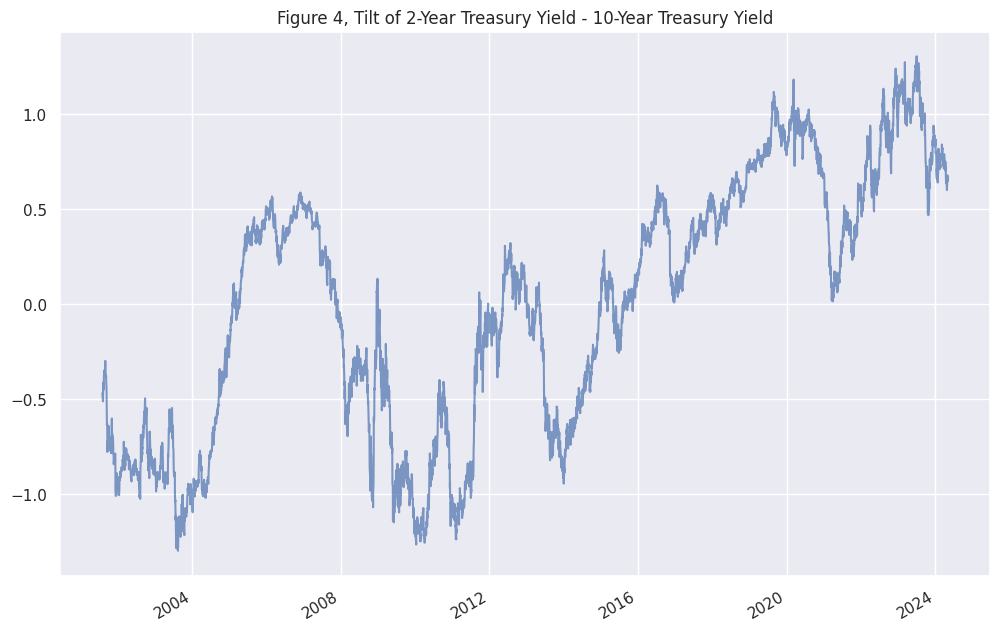

In [23]:
# Draw the graph of Slope of 2-Year Treasury Yield - 10-Year Treasury Yield
df_s["Tilt"].plot(figsize=(12, 8), title='Figure 4, Tilt of 2-Year Treasury Yield - 10-Year Treasury Yield', alpha=0.7) # Plot the yields difference
plt.show()

After drawing Figure 4 for the yield difference between the 2-year Treasury yield and 10-year Treasury yield, let's draw a graph for PC_2.

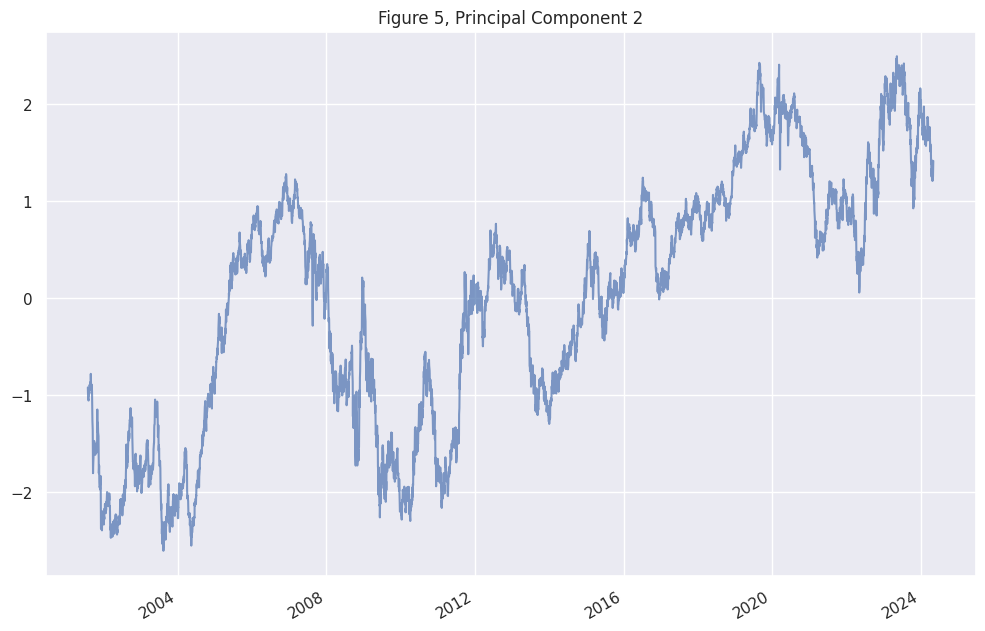

In [24]:
# Draw the graph for PC_2
principal_components["PC_2"].plot(figsize=(12, 8), title='Figure 5, Principal Component 2', alpha=0.7) # Plot the yields
plt.show()

From Figure 4 and Figure 5, we can see that the tilt of the 2-year Treasury yield and 10-year Treasury yield graph has a pattern similar to the PC_2 graph. Let's calculate the correlation to confirm this observation.

In [25]:
np.corrcoef(principal_components["PC_2"], df_s["Tilt"])

array([[1.        , 0.97850538],
       [0.97850538, 1.        ]])

The above code shows that the correlation of PC_2 and Tilt is 97%, which is very high. Hence, we can use the PC_2 as a proxy to analyze how tilted the yield curve is.
<br>
<br>
Now let's draw PC_3, the change of curvature of the yield curve.

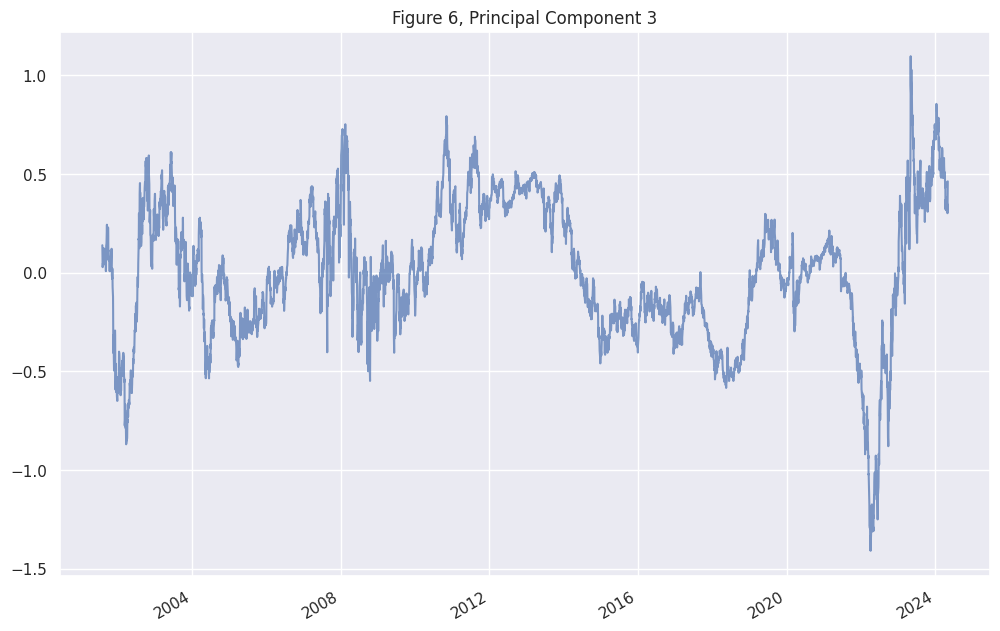

In [26]:
# Draw the graph for PC_3
principal_components["PC_3"].plot(figsize=(12, 8), title='Figure 6, Principal Component 3', alpha=0.7) # Plot the yields
plt.show()

From Figure 6, we can see that the change in curvature of the yield curve oscillates around 0.

## **3. Value at Risk for a Fixed-Income Portfolio**
In this section, we are going to use the feature extraction method we learned in the last section to calculate the Value at Risk of a bond portfolio.
<br>
<br>
### **3.1 Value at Risk (VaR)**
**Value at Risk (VaR)** is a statistical metric to measure the potential maximum loss of an investment or a portfolio at a given time period under certain a confidence level. For example, when a stock portfolio has a VaR of \$1 million during a day at 95% confidence level, it means that there is 95% probability that this stock portfolio will not lose over $1 million in a day.
<br>
VaR is an easy-to-understand risk metric and can be used to compare risks across different asset classes. VaR is usually used in risk management for portfolio management or regulartory reporting. It is also part of the metrics to set risk cap for traders. VaR can also be applied for capital allocation.
<br>
<br>
### **3.2 VaR for a Simple Treasury Bond Portfolio**
We will demonstrate how to calculate VaR for a simple Treasury bond portfolio in this section. This simple bond portfolio will only consist of 2-year Treasury bonds, 5-year Treasury bonds, and 10-year Treastury bonds. First, let's create a dataset with the yields of these three bonds and calculate the daily yield percentage change in these bonds.

In [34]:
# Create a dataset with 3 Treasury bond yields and calculate the yield changes
var_dataset = yields[["2 Year","5 Year","10 Year"]]
var_yield_chng_dataset = var_dataset.pct_change()
var_yield_chng_dataset = var_yield_chng_dataset.dropna()
var_yield_chng_dataset.head()

,2 Year,5 Year,10 Year
2001-08-01,0.010554,0.010941,0.007890
2001-08-02,0.015666,0.015152,0.011742
2001-08-03,0.005141,0.006397,0.005803
2001-08-06,-0.007673,-0.002119,-0.001923
2001-08-07,0.005155,0.002123,0.001927


In [35]:
# Standardize the dataset
var_yield_chng_dataset_means = var_yield_chng_dataset.mean()
var_yield_chng_dataset_stds = var_yield_chng_dataset.std()
var_yld_chng_stnd_data = (var_yield_chng_dataset - var_yield_chng_dataset_means) / var_yield_chng_dataset_stds

Now we can calculate the eigenvectors and eigenvalues of the standardized dataset.

In [36]:
# Calculate eienvectors and eigenvalues and rank by eigenvalues
var_cov_matrix = var_yld_chng_stnd_data.cov()
eigenvalues, eigenvectors = np.linalg.eig(var_cov_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
pca_components = eigenvectors[:, sorted_indices]

Let's check eigenvalues and how much variance of the data is explained by an eigenvector.

In [41]:
# Put data into a DataFrame
df_eigval = pd.DataFrame({"Eigenvalues":eigenvalues}, index=range(1,4))

# Work out explained proportion
df_eigval["Explained proportion"] = df_eigval["Eigenvalues"] / np.sum(df_eigval["Eigenvalues"])
#Format as percentage
df_eigval.style.format({"Explained proportion": "{:.2%}"})

,Eigenvalues,Explained proportion
1,2.545146,84.84%
2,0.384763,12.83%
3,0.070091,2.34%


From the above table, we can see the first two eigenvectors account for 97% of the variance in the dataset. Hence, we are going to select the first two eigenvectors for analysis.

In [42]:
# Choose number of components (e.g., 2)
n_components = 2
selected_components = pca_components[:, :n_components]

Next, let's assume that our simple bond portfolio consists of \$2 million in 2-year Treasury bonds, \$2 million in 5-year Treasury bonds, and \$1 million in 10-year Treasury bonds.

In [39]:
# Define a simple portfolio
portfolio = {
    2: 2000000,  # $2M in 2-year bond
    5: 2000000,  # $2M in 5-year bond
    10: 1000000  # $1M in 10-year bond
}

Next, we will calculate bond sensitivities in the portfolio. We assume the bond durations are the same as their maturity for simplicity. Then, we can calculate the portfolio value changes and VAR.

In [43]:
# Calculate portfolio sensitivities (assuming duration = maturity for simplicity)
sensitivities = np.array([maturity * amount for maturity, amount in portfolio.items()])

# Calculate portfolio value changes
portfolio_changes = (var_yield_chng_dataset*sensitivities) @ selected_components

# Calculate VaR
confidence_level = 0.95  # 95% VaR
var = -np.percentile(portfolio_changes, 100 * (1 - confidence_level))

print(f"1-day 95% VaR: ${var:,.2f}")

# Display summary statistics
print("\nSummary Statistics:")
print(f"Portfolio Value: ${sum(portfolio.values()):,.2f}")
print(f"VaR as % of Portfolio Value: {var / sum(portfolio.values()) * 100:.3f}%")

1-day 95% VaR: $458,248.59

Summary Statistics:
Portfolio Value: $5,000,000.00
VaR as % of Portfolio Value: 9.165%


The above result shows that the 1-day VaR at 95% confidence level for our simple Treasury bond portfolio is $458,249. It is about 9% of the total portfolio value. The above example demonstrates how to use the feature extraction method to reduce the portfolio dataset and use the smaller dataset to calculate VaR.
<br>
<br>
## **4. Conclusion**
In this lesson, we first went through the basics of bivariate analysis. We explained what bivariate analysis is and then we introduced the concepts of covariance and correlation. We then moved on to applying the feature extraction method to analyze the Treasury yield curve. We learned how to standardize a dataset. We also learned what eigenvectors and eigenvalues are. Then, we moved to conduct feature extraction from the Treasury bond yield. Next, we also applied the feature extraction method to calculate the Value at Risk of a simple Treasury bond portfolio. These tools are fundamental for understanding more advanced financial theories.

**References**
<br>
* Bjerring, Thomas T. "The Yield Curve and Its Components." *Github*, 16 October 2019, https://bjerring.github.io/bonds/2019/10/16/the-yield-curve-and-its-components.html.
<br>
* Oprea, Andreea. "The Use of Principal Component Analysis (PCA) in Building Yield Curve Scenarios and Identifying Relative-Value Trading Opportunities on the Romanian Government Bond Market." *Journal of Risk and Financial Management*, vol. 15, no. 6, 2022. https://www.mdpi.com/1911-8074/15/6/247.


---
Copyright 2024 WorldQuant University. This
content is licensed solely for personal use. Redistribution or
publication of this material is strictly prohibited.
